In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [3]:
five = data[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()
five

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [4]:
INTC = pd.DataFrame(data['INTC.O'].dropna())
INTC

,INTC.O
Date,
2010-01-04,20.88
2010-01-05,20.87
2010-01-06,20.80
2010-01-07,20.60
2010-01-08,20.83
...,...
2018-06-25,50.71
2018-06-26,49.67
2018-06-27,48.76


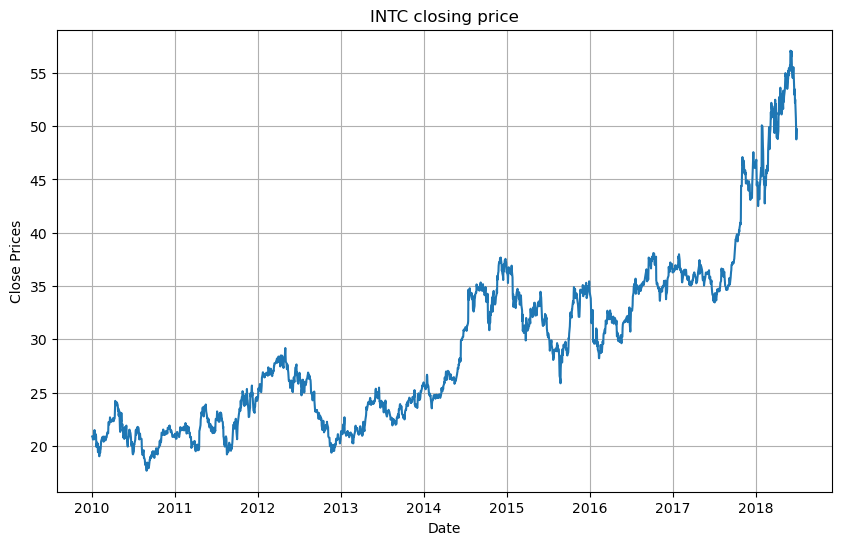

In [5]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(INTC)
plt.title('INTC closing price')
plt.show()

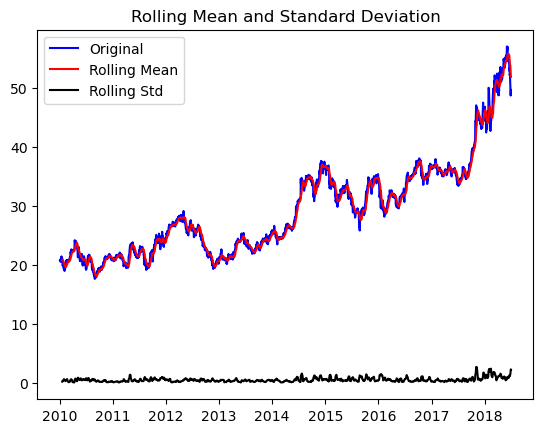

Results of dickey fuller test
Test Statistics                  -0.216480
p-value                           0.936529
No. of lags used                 19.000000
Number of observations used    2118.000000
critical value (1%)              -3.433441
critical value (5%)              -2.862906
critical value (10%)             -2.567497
dtype: float64


In [6]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(INTC)

# https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima

<Figure size 640x480 with 0 Axes>

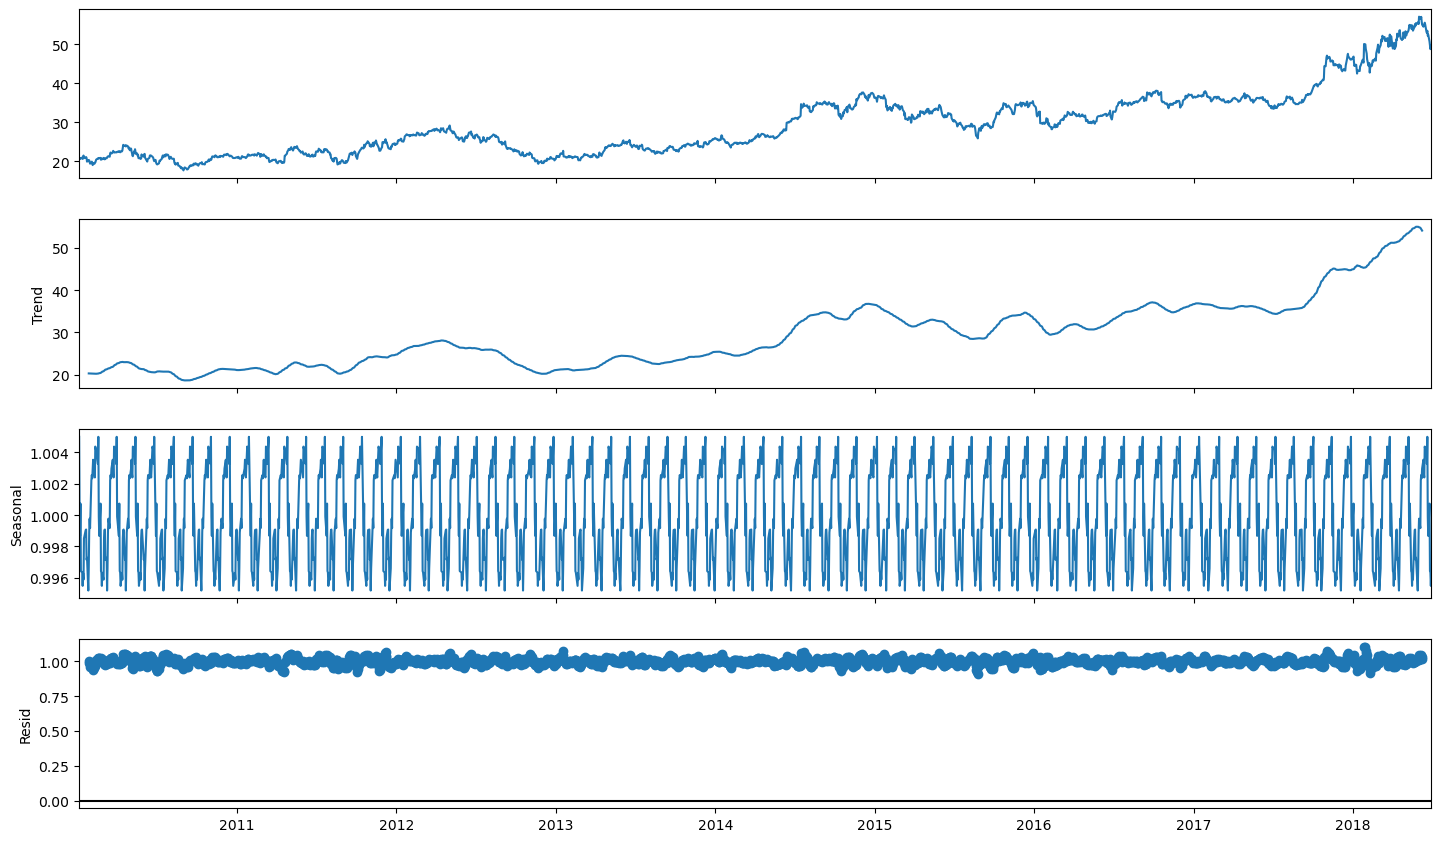

In [7]:
# To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
result = seasonal_decompose(INTC, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

In [8]:
# Split data into train and test sets
X = INTC.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

## the Auto ARIMA model provided the optimal parameters p,d, and q as 0, 1 and 0 respectively

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (2) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1688.843, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1685.908, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1686.842, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1686.846, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1684.913, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.050 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1710
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -841.457
Date:                Thu, 11 Apr 2024   AIC                           1684.913
Time:                        02:55:58   BIC                           1690.357
Sample:                             0   HQIC                          1686.928
                               - 1710                                       

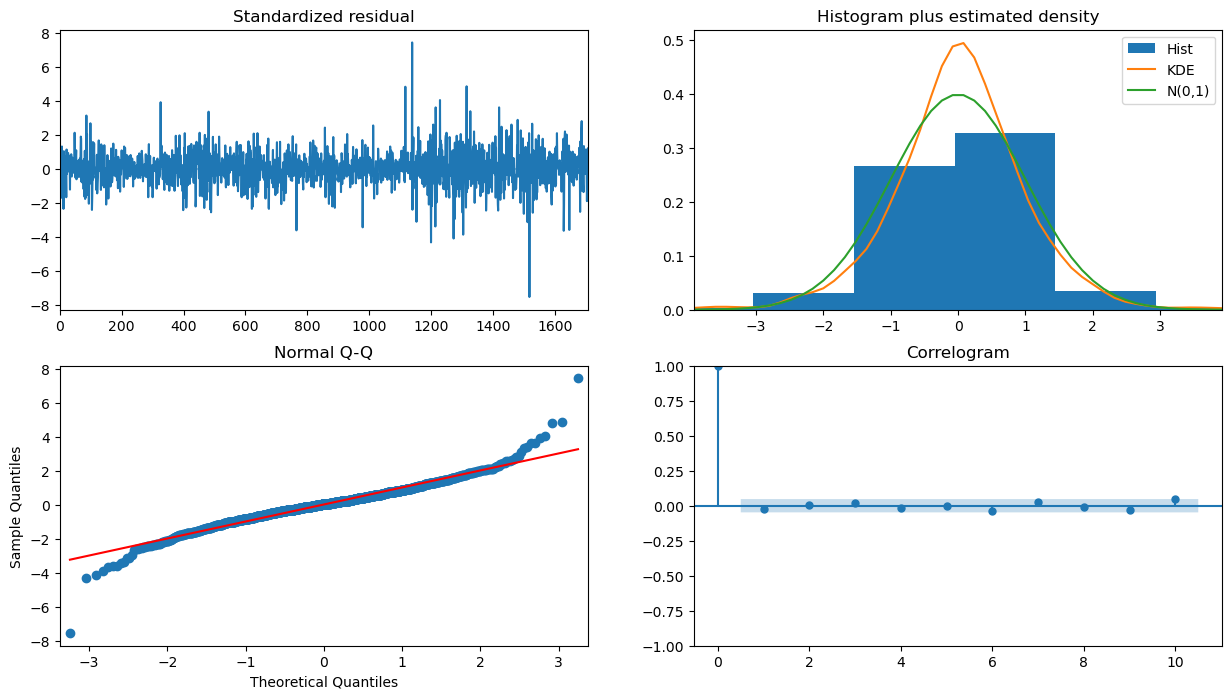

In [9]:
model_autoARIMA = auto_arima(train, start_p=1, start_q=1,test='adf',max_p=4, max_q=4,
                      m=2,d=None,seasonal=False,start_P=1,D=2,trace=True,error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima/notebook

In [10]:
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

In [11]:
# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

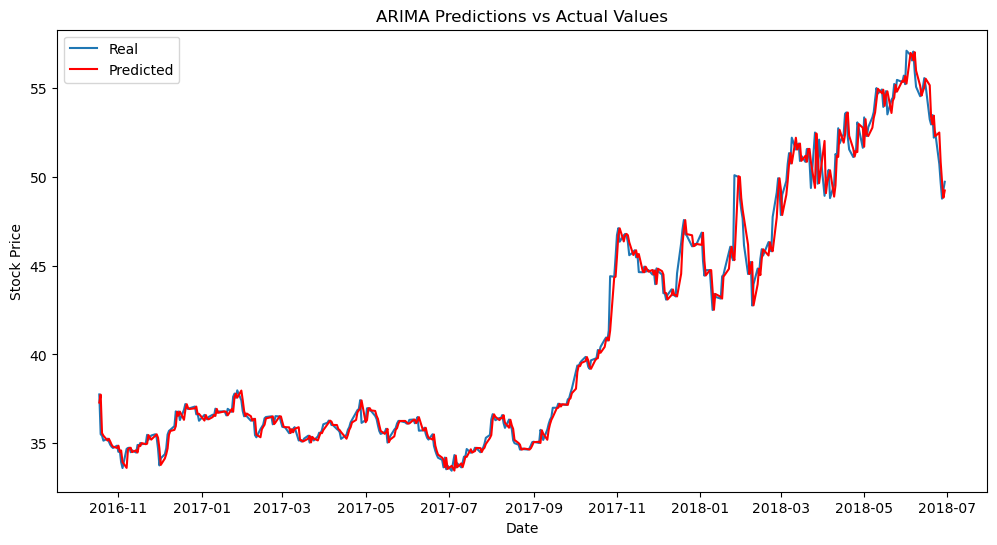

In [12]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(INTC.iloc[size:,:].index, test, label='Real')
plt.plot(INTC.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# https://medium.com/shikhars-data-science-projects/predicting-stock-prices-using-arima-fourier-transformation-and-deep-learning-e5fb4f693c85

In [13]:
np.mean(np.abs(predictions - test)/np.abs(test))

0.17840497883503453

In [14]:
INTC_test = INTC.iloc[size:len(X)]
INTC_test.loc[:,'Ari_Pred_Price'] = predictions # stock price predicted by ARIMA
# Benchmark returns
INTC_test['Returns'] = np.log(INTC_test['INTC.O']/INTC_test['INTC.O'].shift(1))
# Returns predicted by Arima
INTC_test['Ari_pred_ret'] = np.log(INTC_test['Ari_Pred_Price']/INTC_test['Ari_Pred_Price'].shift(1))
# direction predicted by Arima
INTC_test['Ari_pred_dir'] = np.sign(INTC_test['Ari_Pred_Price']-INTC_test['INTC.O'].shift(1))
INTC_test.dropna(inplace = True)
# long when predicted direction is +1, vice versa, then compute returns
INTC_test['Ari_ret'] = INTC_test['Ari_pred_dir'] * INTC_test['Returns']
INTC_test

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\3908472790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test.loc[:,'Ari_Pred_Price'] = predictions # stock price predicted by ARIMA
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\3908472790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test['Returns'] = np.log(INTC_test['INTC.O']/INTC_test['INTC.O'].shift(1))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\3908472790.py:6: SettingWithCopyWarning

,INTC.O,Ari_Pred_Price,Returns,Ari_pred_ret,Ari_pred_dir,Ari_ret
Date,,,,,,
2016-10-19,35.51,37.738666,-0.061171,0.011855,-1.0,0.061171
2016-10-20,35.43,35.573756,-0.002255,-0.059077,1.0,-0.002255
2016-10-21,35.15,35.432183,-0.007934,-0.003988,1.0,-0.007934
2016-10-24,35.26,35.157616,0.003125,-0.007779,1.0,0.003125
2016-10-25,35.10,35.256996,-0.004548,0.002823,-1.0,0.004548
...,...,...,...,...,...,...
2018-06-25,50.71,52.479983,-0.034690,0.003986,-1.0,0.034690
2018-06-26,49.67,50.827680,-0.020722,-0.031991,1.0,-0.020722
2018-06-27,48.76,49.733804,-0.018491,-0.021756,1.0,-0.018491


In [15]:
# Compare total returns from arima with benchmark
INTC_test[['Returns', 'Ari_ret']].sum().apply(np.exp)

Returns    1.316821
Ari_ret    2.015880
dtype: float64

Text(0.5, 1.0, 'INTC')

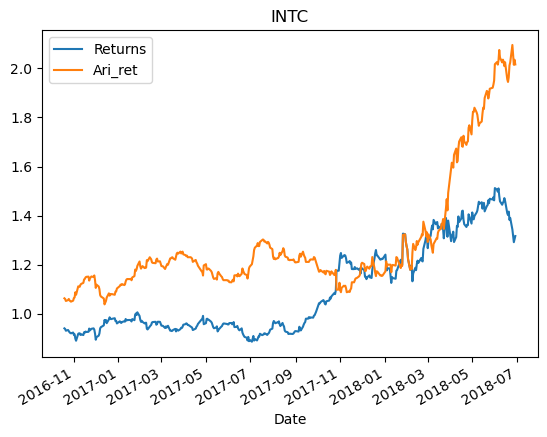

In [16]:
# plot the cumulative returns
INTC_test[['Returns', 'Ari_ret']].cumsum().apply(np.exp).plot()
plt.title('INTC')

<Axes: xlabel='Date'>

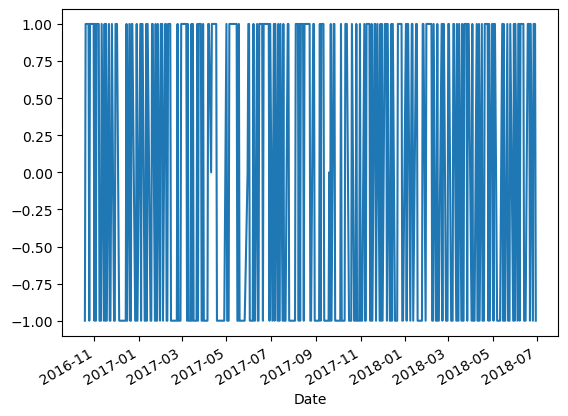

In [17]:
INTC_test['Ari_pred_dir'].plot()

In [18]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as spi
import statsmodels.api as sm
from itertools import product
import pymc as pm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [19]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col = 0, parse_dates = True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [20]:
vol = pd.DataFrame()
raw1 = yf.download(['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS'], start = '2010-01-01', end= '2018-06-30')
vol['AAPL.O'] = raw1['Volume']['AAPL']
vol['MSFT.O'] = raw1['Volume']['MSFT']
vol['INTC.O'] = raw1['Volume']['INTC']
vol['AMZN.O'] = raw1['Volume']['AMZN']
vol['GS.N'] = raw1['Volume']['GS']
vol

[*********************100%%**********************]  5 of 5 completed


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,493729600,38409100,47800900,151998000,9135000
2010-01-05,601904800,49749600,52357700,177038000,11659400
2010-01-06,552160000,58182400,40037400,143576000,7381100
2010-01-07,477131200,50559700,54041500,220604000,8727400
2010-01-08,447610800,51197400,48234700,196610000,7268100
...,...,...,...,...,...
2018-06-25,126652400,35433300,45356500,150224000,3817700
2018-06-26,98276800,26897200,37543000,87732000,2692900
2018-06-27,101141200,31298400,33338800,97444000,3104200


In [21]:
data = raw[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']]
data.dropna(inplace=True)
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\3340317063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [22]:
EWM = data.ewm(alpha=0.75 , min_periods = 20 , adjust = False).mean()
EWM

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-25,182.907462,98.947979,51.156661,1677.427439,222.738311
2018-06-26,184.049366,99.046995,50.041665,1687.674360,221.869578
2018-06-27,184.132341,97.916749,49.080416,1667.301090,220.602394


In [23]:
delta = data.diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
average_gain = gain.rolling(window=14, min_periods=14).mean()
average_loss = loss.rolling(window=14, min_periods=14).mean()
RS = average_gain / average_loss
RSI = 100 - (100 / (1 + RS))
RSI

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-25,16.036585,32.789855,22.390892,40.836829,33.669549
2018-06-26,23.457476,35.083115,16.787004,48.882494,18.621096
2018-06-27,23.788050,35.299296,17.158672,43.812062,11.311953


In [24]:
rets = np.log(data / data.shift(1))
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093
...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338


In [25]:
rets['AAPLvola'] = rets['AAPL.O'].rolling(14).std()
rets['INTCvola'] = rets['INTC.O'].rolling(14).std()
rets['MSFTvola'] = rets['MSFT.O'].rolling(14).std()
rets['AMZNvola'] = rets['AMZN.O'].rolling(14).std()
rets['GSvola'] = rets['GS.N'].rolling(14).std()
rets['AAPLvolat'] = rets['AAPL.O'].rolling(42).std()
rets['INTCvolat'] = rets['INTC.O'].rolling(42).std()
rets['MSFTvolat'] = rets['MSFT.O'].rolling(42).std()
rets['AMZNvolat'] = rets['AMZN.O'].rolling(42).std()
rets['GSvolat'] = rets['GS.N'].rolling(42).std()
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,AAPLvola,INTCvola,MSFTvola,AMZNvola,GSvola,AAPLvolat,INTCvolat,MSFTvolat,AMZNvolat,GSvolat
Date,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,0.006855,0.015982,0.009350,0.010747,0.008766,0.012230,0.016184,0.010550,0.011721,0.009592
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.007945,0.015571,0.009598,0.011787,0.006914,0.012322,0.015653,0.010136,0.010510,0.009559
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,0.007963,0.015481,0.009580,0.012722,0.006486,0.012131,0.015856,0.010170,0.009650,0.009583


In [26]:
data['RSI_Signal_AAPL.O'] = np.where(RSI['AAPL.O'] < 30, 1, np.where(RSI['AAPL.O'] > 70, -1, 0))
data['RSI_Signal_MSFT.O'] = np.where(RSI['MSFT.O'] < 30, 1, np.where(RSI['MSFT.O'] > 70, -1, 0))
data['RSI_Signal_INTC.O'] = np.where(RSI['INTC.O'] < 30, 1, np.where(RSI['INTC.O'] > 70, -1, 0))
data['RSI_Signal_AMZN.O'] = np.where(RSI['AMZN.O'] < 30, 1, np.where(RSI['AMZN.O'] > 70, -1, 0))
data['RSI_Signal_GS.N'] = np.where(RSI['GS.N'] < 30, 1, np.where(RSI['GS.N'] > 70, -1, 0))
data

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\4205982714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI_Signal_AAPL.O'] = np.where(RSI['AAPL.O'] < 30, 1, np.where(RSI['AAPL.O'] > 70, -1, 0))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\4205982714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI_Signal_MSFT.O'] = np.where(RSI['MSFT.O'] < 30, 1, np.where(RSI['MSFT.O'] > 70, -1, 0))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\420598

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,RSI_Signal_AAPL.O,RSI_Signal_MSFT.O,RSI_Signal_INTC.O,RSI_Signal_AMZN.O,RSI_Signal_GS.N
Date,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0,0,0,0,0
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0,0,0,0,0
2010-01-06,30.138541,30.770,20.80,132.25,174.26,0,0,0,0,0
2010-01-07,30.082827,30.452,20.60,130.00,177.67,0,0,0,0,0
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,1,0,1,0,0
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,1,0,1,0,1
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,1,0,1,0,1


In [27]:
INTC = data[['INTC.O']]

In [28]:
INTC = pd.merge(INTC, EWM['INTC.O'], left_index=True, right_index=True, how='left')
INTC = INTC.rename(columns={'INTC.O_x': 'close', "INTC.O_y": "EWM"})
INTC

,close,EWM
Date,,
2010-01-04,20.88,NaN
2010-01-05,20.87,NaN
2010-01-06,20.80,NaN
2010-01-07,20.60,NaN
2010-01-08,20.83,NaN
...,...,...
2018-06-25,50.71,51.156661
2018-06-26,49.67,50.041665
2018-06-27,48.76,49.080416


In [29]:
INTC = pd.merge(INTC, RSI['INTC.O'], left_index=True, right_index=True, how='left')
INTC = INTC.rename(columns={"INTC.O": "RSI"})
INTC['return'] = np.log(INTC['close'] / INTC['close'].shift(1))
INTC

,close,EWM,RSI,return
Date,,,,
2010-01-04,20.88,NaN,NaN,NaN
2010-01-05,20.87,NaN,NaN,-0.000479
2010-01-06,20.80,NaN,NaN,-0.003360
2010-01-07,20.60,NaN,NaN,-0.009662
2010-01-08,20.83,NaN,NaN,0.011103
...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690
2018-06-26,49.67,50.041665,16.787004,-0.020722
2018-06-27,48.76,49.080416,17.158672,-0.018491


In [30]:
INTC['PnL'] = np.where(INTC['return'] > 0, 1, -1)
INTC

,close,EWM,RSI,return,PnL
Date,,,,,
2010-01-04,20.88,NaN,NaN,NaN,-1
2010-01-05,20.87,NaN,NaN,-0.000479,-1
2010-01-06,20.80,NaN,NaN,-0.003360,-1
2010-01-07,20.60,NaN,NaN,-0.009662,-1
2010-01-08,20.83,NaN,NaN,0.011103,1
...,...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690,-1
2018-06-26,49.67,50.041665,16.787004,-0.020722,-1
2018-06-27,48.76,49.080416,17.158672,-0.018491,-1


In [31]:
INTC['RSI lag1'] = INTC['RSI'].shift(1)
INTC['RSI bin'] = pd.cut(INTC['RSI'], bins=20, labels = False)
INTC['RSI bin'] += 1
INTC['RSI bin lag1'] = INTC['RSI bin'].shift(1)
INTC.dropna(inplace = True)
INTC

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1
Date,,,,,,,,
2010-02-01,19.61,19.594335,37.509321,0.010767,1,36.442928,7.0,7.0
2010-02-02,19.91,19.831084,43.442315,0.015182,1,37.509321,9.0,7.0
2010-02-03,19.68,19.717771,37.692308,-0.011619,-1,43.442315,7.0,9.0
2010-02-04,19.02,19.194443,26.966292,-0.034112,-1,37.692308,5.0,7.0
2010-02-05,19.47,19.401111,36.986301,0.023384,1,26.966292,7.0,5.0
...,...,...,...,...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690,-1,26.077348,4.0,5.0
2018-06-26,49.67,50.041665,16.787004,-0.020722,-1,22.390892,3.0,4.0
2018-06-27,48.76,49.080416,17.158672,-0.018491,-1,16.787004,3.0,3.0


In [32]:
for i in range(1,6):
    colname = "lag" + str(i)
    INTC[colname] = INTC['return'].shift(i)

INTC['EWM_normal'] = (INTC['EWM'] - INTC['EWM'].min()) / (INTC['EWM'].max() - INTC['EWM'].min())
INTC['RSI normal'] = (INTC['RSI'] - INTC['RSI'].min()) / (INTC['RSI'].max() - INTC['RSI'].min())
INTC

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,lag3,lag4,lag5,EWM_normal,RSI normal
Date,,,,,,,,,,,,,,,
2010-02-01,19.61,19.594335,37.509321,0.010767,1,36.442928,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0.046778,0.347090
2010-02-02,19.91,19.831084,43.442315,0.015182,1,37.509321,9.0,7.0,0.010767,NaN,NaN,NaN,NaN,0.052824,0.413738
2010-02-03,19.68,19.717771,37.692308,-0.011619,-1,43.442315,7.0,9.0,0.015182,0.010767,NaN,NaN,NaN,0.049930,0.349145
2010-02-04,19.02,19.194443,26.966292,-0.034112,-1,37.692308,5.0,7.0,-0.011619,0.015182,0.010767,NaN,NaN,0.036566,0.228655
2010-02-05,19.47,19.401111,36.986301,0.023384,1,26.966292,7.0,5.0,-0.034112,-0.011619,0.015182,0.010767,NaN,0.041844,0.341214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690,-1,26.077348,4.0,5.0,0.005922,-0.024043,0.009963,-0.005464,-0.034897,0.852801,0.177257
2018-06-26,49.67,50.041665,16.787004,-0.020722,-1,22.390892,3.0,4.0,-0.034690,0.005922,-0.024043,0.009963,-0.005464,0.824327,0.114306
2018-06-27,48.76,49.080416,17.158672,-0.018491,-1,16.787004,3.0,3.0,-0.020722,-0.034690,0.005922,-0.024043,0.009963,0.799779,0.118481


In [33]:
INTC['ewa lag1'] = INTC['EWM_normal'].shift(1)
INTC['RSI lag1'] = INTC['RSI normal'].shift(1)
INTC['close lag1'] = INTC['close'].shift(1)
INTC['SPYlag1'] = raw['SPY'].shift(1)
INTC['VIXlag1'] = raw['.VIX'].shift(1)
INTC['EURlag1'] = raw['EUR='].shift(1)
INTC['GLDlag1'] = raw['GLD'].shift(1)
INTC[['AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1']] = vol[['AAPL.O','AMZN.O','GS.N','INTC.O','MSFT.O' ]].shift(1)
INTC[['AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1']] = data[['AAPL.O','AMZN.O','GS.N','INTC.O','MSFT.O' ]].shift(1)
INTC['volalag1'] = rets['INTCvola'].shift(1)
INTC.dropna(inplace = True)
INTC

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,...,AMZNvollag1,GSvollag1,INTCvollag1,MSFTvollag1,AAPLlag1,AMZNlag1,GSlag1,INTClag1,MSFTlag1,volalag1
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-08,19.35,19.362778,32.931727,-0.006182,-1,0.341214,6.0,7.0,0.023384,-0.034112,...,220496000.0,18759200.0,88711700.0,80960100.0,27.922829,117.39,154.16,19.47,28.02,0.021489
2010-02-09,19.65,19.578194,36.380952,0.015385,1,0.295667,7.0,6.0,-0.006182,0.023384,...,197804000.0,10257300.0,62563200.0,52820600.0,27.731401,116.83,151.10,19.35,27.72,0.020947
2010-02-10,19.69,19.662049,38.613861,0.002034,1,0.334414,8.0,7.0,0.015385,-0.006182,...,184460000.0,14017300.0,69454100.0,59195800.0,28.027115,118.03,152.49,19.65,28.01,0.021649
2010-02-11,20.06,19.960512,51.670379,0.018617,1,0.359498,11.0,8.0,0.002034,0.015385,...,124664000.0,10555300.0,56250600.0,48591300.0,27.873686,117.36,153.63,19.69,27.99,0.021641
2010-02-12,20.43,20.312628,51.235955,0.018277,1,0.506168,11.0,11.0,0.018617,0.002034,...,166870000.0,11163400.0,58837300.0,65993700.0,28.381400,120.09,154.05,20.06,28.12,0.018763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690,-1,0.218669,4.0,5.0,0.005922,-0.024043,...,81502000.0,2731800.0,34682100.0,38923100.0,184.920000,1715.67,226.02,52.50,100.41,0.013977
2018-06-26,49.67,50.041665,16.787004,-0.020722,-1,0.177257,3.0,4.0,-0.034690,0.005922,...,150224000.0,3817700.0,45356500.0,35433300.0,182.170000,1663.15,221.54,50.71,98.39,0.015982
2018-06-27,48.76,49.080416,17.158672,-0.018491,-1,0.114306,3.0,3.0,-0.020722,-0.034690,...,87732000.0,2692900.0,37543000.0,26897200.0,184.430000,1691.09,221.58,49.67,99.08,0.015571


In [34]:
INTC_neu_lag = INTC.copy() # to prevent from modifying original dataset
INTC_neu_lag['neu_pred'] = 0
INTC_neu_lag

,close,EWM,RSI,return,PnL,RSI lag1,RSI bin,RSI bin lag1,lag1,lag2,...,GSvollag1,INTCvollag1,MSFTvollag1,AAPLlag1,AMZNlag1,GSlag1,INTClag1,MSFTlag1,volalag1,neu_pred
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-08,19.35,19.362778,32.931727,-0.006182,-1,0.341214,6.0,7.0,0.023384,-0.034112,...,18759200.0,88711700.0,80960100.0,27.922829,117.39,154.16,19.47,28.02,0.021489,0
2010-02-09,19.65,19.578194,36.380952,0.015385,1,0.295667,7.0,6.0,-0.006182,0.023384,...,10257300.0,62563200.0,52820600.0,27.731401,116.83,151.10,19.35,27.72,0.020947,0
2010-02-10,19.69,19.662049,38.613861,0.002034,1,0.334414,8.0,7.0,0.015385,-0.006182,...,14017300.0,69454100.0,59195800.0,28.027115,118.03,152.49,19.65,28.01,0.021649,0
2010-02-11,20.06,19.960512,51.670379,0.018617,1,0.359498,11.0,8.0,0.002034,0.015385,...,10555300.0,56250600.0,48591300.0,27.873686,117.36,153.63,19.69,27.99,0.021641,0
2010-02-12,20.43,20.312628,51.235955,0.018277,1,0.506168,11.0,11.0,0.018617,0.002034,...,11163400.0,58837300.0,65993700.0,28.381400,120.09,154.05,20.06,28.12,0.018763,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.71,51.156661,22.390892,-0.034690,-1,0.218669,4.0,5.0,0.005922,-0.024043,...,2731800.0,34682100.0,38923100.0,184.920000,1715.67,226.02,52.50,100.41,0.013977,0
2018-06-26,49.67,50.041665,16.787004,-0.020722,-1,0.177257,3.0,4.0,-0.034690,0.005922,...,3817700.0,45356500.0,35433300.0,182.170000,1663.15,221.54,50.71,98.39,0.015982,0
2018-06-27,48.76,49.080416,17.158672,-0.018491,-1,0.114306,3.0,3.0,-0.020722,-0.034690,...,2692900.0,37543000.0,26897200.0,184.430000,1691.09,221.58,49.67,99.08,0.015571,0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\4057241493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_neu_lag['neu_pred'][1628:] = model.fit(X_train_pca, INTC_neu_lag['PnL'][:1628]).predict(X_test_pca)


<Axes: xlabel='Date'>

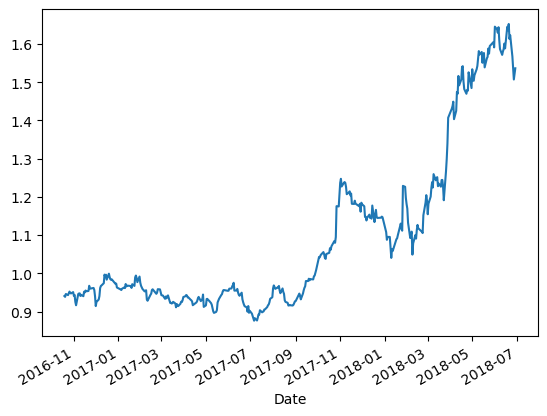

In [35]:
X_train = INTC_neu_lag[['volalag1','AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1', 'AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1','ewa lag1', 'lag1', 'lag2', 'RSI lag1','SPYlag1','VIXlag1','EURlag1','GLDlag1']][:1628]
X_test = INTC_neu_lag[['volalag1','AAPLlag1','AMZNlag1','GSlag1','INTClag1','MSFTlag1', 'AAPLvollag1','AMZNvollag1','GSvollag1','INTCvollag1','MSFTvollag1', 'ewa lag1', 'lag1', 'lag2', 'RSI lag1','SPYlag1','VIXlag1','EURlag1','GLDlag1']][1628:]
pca = PCA(n_components = 8)  # Choose number of components, 2 is the only one that give an acceptable return
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
INTC_neu_lag['neu_pred'][1628:] = model.fit(X_train_pca, INTC_neu_lag['PnL'][:1628]).predict(X_test_pca)

(INTC_neu_lag['neu_pred'] * INTC_neu_lag['return'])[1628:].cumsum().apply(np.exp).plot()

<Axes: xlabel='Date'>

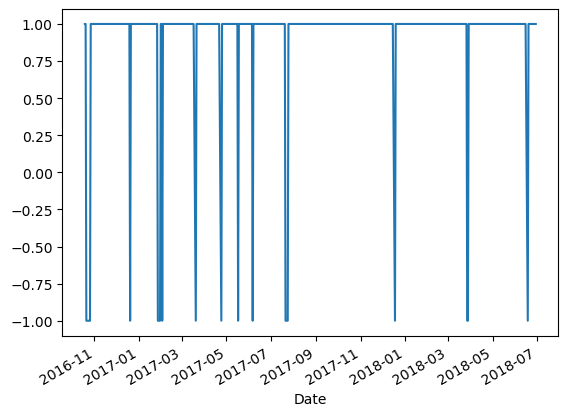

In [36]:
INTC_neu_lag['neu_pred'][1628:].plot()

In [37]:
INTC_test['neu_pred'] = INTC_neu_lag['neu_pred'][1628:]
INTC_test['volalag1'] = INTC_neu_lag['volalag1'][1628:]
INTC_test['volatlag1'] = rets['INTCvolat'].shift(1)
INTC_test['modpred'] = np.where(INTC_test['volalag1'] > INTC_test['volatlag1'],INTC_test['neu_pred'],  INTC_test['Ari_pred_dir'])
INTC_test

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\964907569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test['neu_pred'] = INTC_neu_lag['neu_pred'][1628:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\964907569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test['volalag1'] = INTC_neu_lag['volalag1'][1628:]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\964907569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,INTC.O,Ari_Pred_Price,Returns,Ari_pred_ret,Ari_pred_dir,Ari_ret,neu_pred,volalag1,volatlag1,modpred
Date,,,,,,,,,,
2016-10-19,35.51,37.738666,-0.061171,0.011855,-1.0,0.061171,1.0,0.009067,0.011116,-1.0
2016-10-20,35.43,35.573756,-0.002255,-0.059077,1.0,-0.002255,1.0,0.018870,0.014723,1.0
2016-10-21,35.15,35.432183,-0.007934,-0.003988,1.0,-0.007934,-1.0,0.018380,0.014718,-1.0
2016-10-24,35.26,35.157616,0.003125,-0.007779,1.0,0.003125,-1.0,0.018390,0.014769,-1.0
2016-10-25,35.10,35.256996,-0.004548,0.002823,-1.0,0.004548,-1.0,0.018513,0.014736,-1.0
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,50.71,52.479983,-0.034690,0.003986,-1.0,0.034690,1.0,0.013977,0.015247,-1.0
2018-06-26,49.67,50.827680,-0.020722,-0.031991,1.0,-0.020722,1.0,0.015982,0.016184,1.0
2018-06-27,48.76,49.733804,-0.018491,-0.021756,1.0,-0.018491,1.0,0.015571,0.015653,1.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\1656318901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test['modifiedreturn']=INTC_test['modpred'] * INTC_test['Returns']
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32116\1656318901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INTC_test['arimareturn']=INTC_test['Ari_pred_dir'] * INTC_test['Returns']


Text(0.5, 1.0, 'INTC')

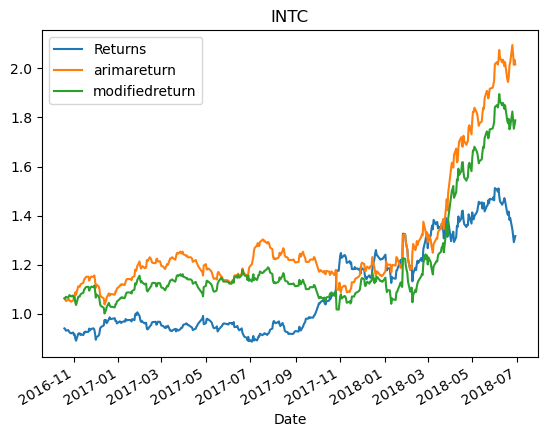

In [38]:
INTC_test['modifiedreturn']=INTC_test['modpred'] * INTC_test['Returns']
INTC_test['arimareturn']=INTC_test['Ari_pred_dir'] * INTC_test['Returns']
INTC_test['Returns'].cumsum().apply(np.exp).plot()
INTC_test['arimareturn'].cumsum().apply(np.exp).plot()
INTC_test['modifiedreturn'].cumsum().apply(np.exp).plot()
plt.legend()
plt.title('INTC')

In [39]:
INTC_test[['modifiedreturn','arimareturn','Returns']].sum().apply(np.exp)

modifiedreturn    1.788013
arimareturn       2.015880
Returns           1.316821
dtype: float64

In [40]:
table=pd.DataFrame()
table['cumsum']=INTC_test[['modifiedreturn','arimareturn','Returns']].sum().apply(np.exp)
table['cumsum1']=INTC_test[['modifiedreturn','arimareturn','Returns']].sum()
table['stdday']=INTC_test[['modifiedreturn','arimareturn','Returns']].std()
table['returnannual']=table['cumsum1']*252/427
table['stdannual']=table['stdday']*np.sqrt(252)
table['sharpe']=(table['returnannual']-0.01)/table['stdannual']
table

,cumsum,cumsum1,stdday,returnannual,stdannual,sharpe
modifiedreturn,1.788013,0.581105,0.015178,0.342947,0.240940,1.381867
arimareturn,2.015880,0.701056,0.015100,0.413738,0.239706,1.684306
Returns,1.316821,0.275221,0.015232,0.162425,0.241795,0.630390
